In [ ]:
SIMULAÇÃO DE MONTECARLO PARA CALCULAR O VPL DOS DOIS PROJETOS

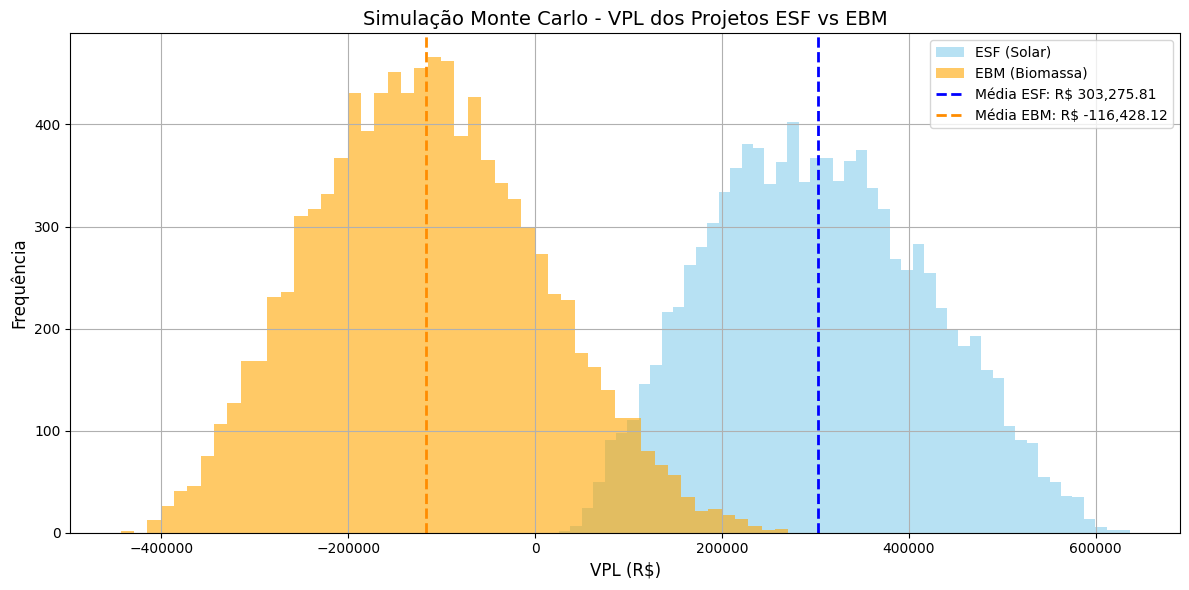

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Configurações gerais
anos = 15
n_simulacoes = 10000

# Função de simulação de VPL para um projeto
def simular_vpl(preco_range, eficiencia_range, custo_var_range, selic_range, ipca_mensal_range, 
                capacidade_mwh, custo_fixo, investimento_inicial):

    vpls = []

    for _ in range(n_simulacoes):
        # Amostragem dos parâmetros de entrada
        preco = np.random.uniform(*preco_range)
        eficiencia = np.random.uniform(*eficiencia_range)
        custo_var = np.random.uniform(*custo_var_range)

        selic_anual = np.random.uniform(*selic_range) / 100
        ipca_mensal = np.random.uniform(*ipca_mensal_range) / 100
        ipca_anual = (1 + ipca_mensal) ** 12 - 1 #converter porque extraí os dados mensais

        # Cálculo da taxa real de desconto
        taxa_real = (1 + selic_anual) / (1 + ipca_anual) - 1

        # Fluxo de caixa anual
        receita = preco * capacidade_mwh * eficiencia
        custo_total = custo_var * capacidade_mwh * eficiencia + custo_fixo
        fluxo_caixa = receita - custo_total

        # Cálculo do VPL
        vpl = -investimento_inicial
        for t in range(1, anos + 1):
            vpl += fluxo_caixa / ((1 + taxa_real) ** t)
        
        vpls.append(vpl)
    
    return np.array(vpls)

# Intervalos fornecidos
selic_range = (12.0484, 12.2516)
ipca_mensal_range = (0.4127, 0.4873)

# === Simulação ESF ===
vpl_esf = simular_vpl(
    preco_range=(135.58, 168.82),
    eficiencia_range=(0.20, 0.30),
    custo_var_range=(5, 15),
    selic_range=selic_range,
    ipca_mensal_range=ipca_mensal_range,
    capacidade_mwh=2500,
    custo_fixo=5000,
    investimento_inicial=500000
)

# === Simulação EBM ===
vpl_ebm = simular_vpl(
    preco_range=(147.88, 183.70),
    eficiencia_range=(0.70, 0.90),
    custo_var_range=(25, 50),
    selic_range=selic_range,
    ipca_mensal_range=ipca_mensal_range,
    capacidade_mwh=1000,
    custo_fixo=10000,
    investimento_inicial=1000000
)

# === Visualização dos Resultados ===
plt.figure(figsize=(12, 6))
plt.hist(vpl_esf, bins=50, alpha=0.6, label='ESF (Solar)', color='skyblue')
plt.hist(vpl_ebm, bins=50, alpha=0.6, label='EBM (Biomassa)', color='orange')
plt.axvline(np.mean(vpl_esf), color='blue', linestyle='dashed', linewidth=2,
            label=f'Média ESF: R$ {np.mean(vpl_esf):,.2f}')
plt.axvline(np.mean(vpl_ebm), color='darkorange', linestyle='dashed', linewidth=2,
            label=f'Média EBM: R$ {np.mean(vpl_ebm):,.2f}')
plt.xlabel('VPL (R$)', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.title('Simulação Monte Carlo - VPL dos Projetos ESF vs EBM', fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
    